In [80]:
import pandas as pd
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import statistics
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [81]:

df = pd.read_csv(r"C:\Users\benja\OneDrive\Documents\Classes\Machine Learning\Final Project Fantasy Football\tedata.csv")
# print("DF before KNN Imputation")
# print(df.describe())
df = df.drop(columns = ['name', 'gp_21', 'projected22', 'owners21', 'team21', 'pos21', 'owned22', 'project20', 'actual21', 'passyd_21', 'passtds21', 'int21', 
                        'runyds21', 'runtds21', 'run1st21', 'rec21', 'recyds21', 'rectds21', 'pass1st21', 'returnyds21', 
                       'returntds21', 'twopoint21', 'fumble21', 'pick21', 'salary21', 'project21', 'returnyds20', 'returntd20', 
                       'returnyds19', 'returntd19', 'passyds20', 'passtd20', 'passint20', 'rushyds20', 'rushtd20', 'rush1st20',
                       'passyds19', 'passtd19', 'passint19', 'rushyds19', 'rushtd19', 'rush1st19', 'returnyds19',
                       'returntd19'], axis = 1)

# Define the dependent variable and column names
dependent_variable = 'points21'
#print(df[dependent_variable])
column_names = df.columns.tolist()

important_columns = [column_names]

#IMPUTING WITH KNN
# Specify the number of neighbors 
k_neighbors = 2

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=k_neighbors)

# Perform imputation
df_knn = knn_imputer.fit_transform(df)

# Convert the NumPy array back to a DataFrame
df = pd.DataFrame(df_knn, columns=df.columns)

# Function to identify outliers using IQR
def find_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Identify outliers for each column
outliers_dict = {}
outliers_dependent_var = find_outliers_iqr(df[dependent_variable])

# # Display the DataFrame without outliers in the dependent variable
# print("DataFrame without outliers in the dependent variable:")
# print(df[~outliers_dependent_var].describe())

# #Print the DataFrame with just the outliers
# print("Outliers")
# print(df[outliers_dependent_var].describe())

#Print a summary of the data after imputing
# print("DF After Imputing")
# print(df.describe())

#DF WITH ALL COLUMNS DROPPED
# df_filled = df.dropna()

# Remove rows with outliers in the dependent variable
df = df[~outliers_dependent_var]

X = df.drop(dependent_variable, axis = 'columns')
Y = df[dependent_variable]

print(df.describe())

#get summary of data and save it to a csv file
# df[important_columns].describe().to_csv('SummaryRaw.csv', index = False)
# df_filled[important_columns].describe().to_csv('SummaryFiltered.csv', index= False)



         points21       gp20    points20    actual20   recepts20     recyds20  \
count   43.000000  43.000000   43.000000   43.000000   43.000000    43.000000   
mean   119.895116  14.604651  123.125117  238.406977   39.872093   438.779070   
std     62.855029   1.882116   71.251131  105.954239   22.138389   267.675583   
min     44.529999   8.000000   43.400002   13.000000   10.000000   107.000000   
25%     72.700001  14.500000   69.715001  147.500000   24.500000   230.500000   
50%     94.870003  15.000000  102.234999  260.000000   37.000000   416.000000   
75%    168.600000  16.000000  166.935000  324.000000   51.000000   599.500000   
max    307.299990  16.000000  366.560000  387.000000  107.000000  1416.000000   

         rectd20   rec1st20       pt20   fumble20  ...    owners20  \
count  43.000000  43.000000  43.000000  43.000000  ...   43.000000   
mean    3.732558  24.081395   0.139535   0.430233  ...   36.581395   
std     2.732844  14.836382   0.350605   0.622795  ...   44.

Correlation Matrix:
           points21      gp20  points20  actual20  recepts20  recyds20  \
points21   1.000000 -0.167633  0.504691 -0.478156   0.537249  0.609542   
gp20      -0.167633  1.000000  0.222314 -0.222562   0.225327  0.167454   
points20   0.504691  0.222314  1.000000 -0.954873   0.954749  0.969224   
actual20  -0.478156 -0.222562 -0.954873  1.000000  -0.922663 -0.913970   
recepts20  0.537249  0.225327  0.954749 -0.922663   1.000000  0.965824   
recyds20   0.609542  0.167454  0.969224 -0.913970   0.965824  1.000000   
rectd20    0.227338  0.240494  0.821616 -0.789760   0.633120  0.678914   
rec1st20   0.556112  0.187486  0.978970 -0.914123   0.968369  0.987292   
pt20       0.486621  0.013426  0.529707 -0.438684   0.557575  0.566092   
fumble20   0.216879  0.209500  0.198739 -0.124763   0.226421  0.243061   
pick20    -0.471640  0.089947 -0.278032  0.242264  -0.275053 -0.308861   
salary20   0.422812 -0.355881  0.342169 -0.193932   0.328466  0.415948   
gp19       0.15769

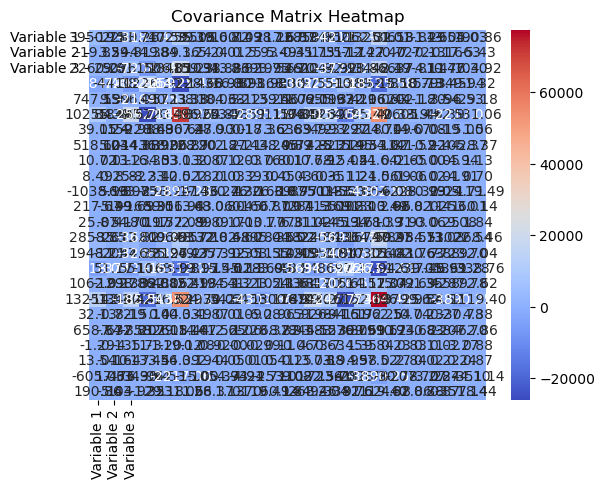

VIF Table:
     Variable           VIF
0        gp20    199.584335
1    points20  22756.657338
2    actual20    298.467978
3   recepts20   2996.493612
4    recyds20   1885.726242
5     rectd20   1455.145705
6    rec1st20    844.315765
7        pt20      3.495142
8    fumble20      5.361690
9      pick20     36.501703
10   salary20     31.346839
11       gp19     50.094708
12   points19  11683.871333
13   owners20     18.996159
14   actual19    306.753351
15  recepts19   1773.069797
16   recyds19   1107.091872
17    rectd19    702.877272
18   rec1st19    789.759013
19       pt19      3.402968
20   fumble19      4.769428
21     pick19     28.797854
22   salary19     33.922547


In [82]:

#Calculate the correlation matrix for all the independent variables, then narrow it down to X independent variables
correlation_matrix = df.corr()
correlation_X = df.corr()
print("Correlation Matrix:")
print(correlation_X)

#Calculate the covariance matrix, then narrowed down to X independent variables
numpy = df.to_numpy()
numpy_X = df.to_numpy()
covariance_matrix = np.cov(numpy_X, rowvar=False)
# Create a heatmap of the covariance matrix
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Variable 1', 'Variable 2', 'Variable 3'],
            yticklabels=['Variable 1', 'Variable 2', 'Variable 3'])
# Add labels and title
plt.title('Covariance Matrix Heatmap')
plt.show()

#Calculate the Variance Inflation Matrix(VIF) to find any multicollinearity
important_dfilled = df.drop(dependent_variable, axis = 'columns')
variables = important_dfilled.values
vif_values = [variance_inflation_factor(variables, i) for i in range(important_dfilled.shape[1])]
# Create a DataFrame to display the results
vif_df = pd.DataFrame({'Variable': important_dfilled.columns, 'VIF': vif_values})
print("VIF Table:")
print(vif_df)


In [83]:
#Decision Tree Model
# Test train split and instantiate the DecisionTreeRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=30)

# Define the parameter grid to search through
param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [1,2,3,4,5],
     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
}


model = DecisionTreeRegressor()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

#model.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

model = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = model.predict(X)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Best Parameters: {'ccp_alpha': 0.5, 'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Mean Squared Error: 3124.157670486343
Mean Squared Error on Training Data: 838.5978506550096
Mean Squared Error on Test Data: 2331.2716924326223
R-squared: 0.3992454791175589


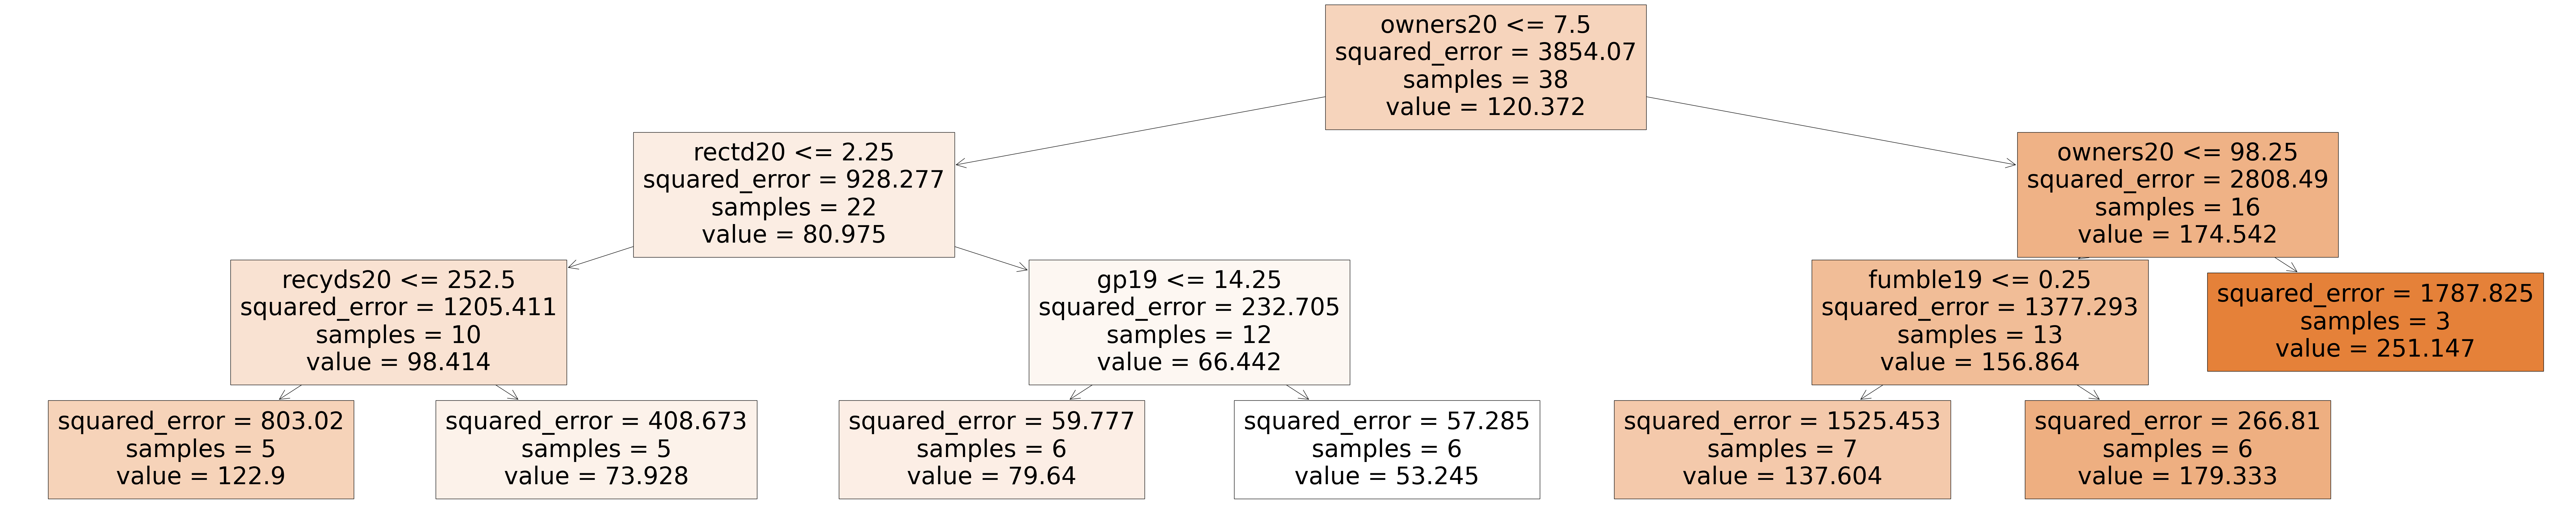

In [84]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(model, feature_names = list(X.columns),  filled = True)
plt.show()

In [85]:
#PCA with all variables passed in
X_standardized = StandardScaler().fit_transform(X)
# Create a PCA instance
n = 10
pca = PCA(n_components=n) 
pca.fit(X_standardized)
# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['PC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)
#print(pc_df)
# Get the explained variance of each principal component
eigenvalues = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
#final_df = pd.concat([df, pc_df], axis=1) # Add 'target' if available
# print(final_df)

Variance explained by each latent variable in PCA:  [0.46106913 0.15602221 0.07577318 0.05711661 0.04721966 0.04404806
 0.03602981 0.0306396  0.02800113 0.02144691]
   Explained Variance  Cumulative Explained Variance
0           10.857080                      10.857080
1            3.673952                      14.531032
2            1.784278                      16.315310
3            1.344960                      17.660270
4            1.111911                      18.772180
5            1.037227                      19.809407
6            0.848416                      20.657824
7            0.721490                      21.379313
8            0.659360                      22.038673
9            0.505024                      22.543697


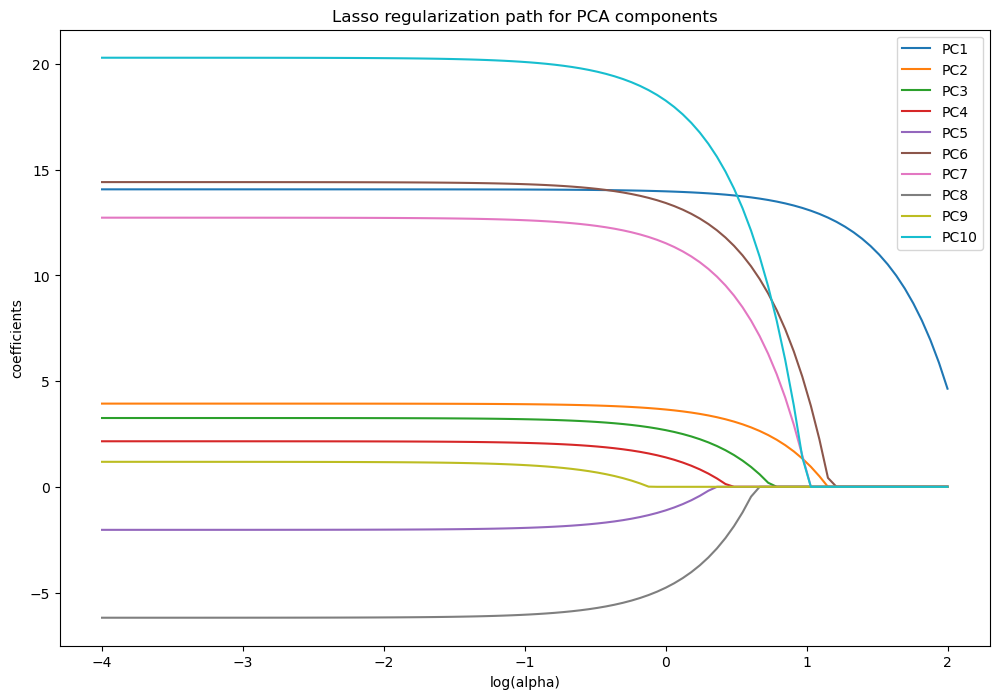

In [86]:
# Choose a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize an array to store coefficients for each alpha
coefs = []

# Fit Lasso for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(principal_components, Y)
    coefs.append(lasso_model.coef_)

# Plot the regularization path
coefs = np.array(coefs)
plt.figure(figsize=(12, 8))

for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'PC{i + 1}')

plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso regularization path for PCA components')
plt.legend()
plt.show()

In [87]:
#Lasso model with the PCA components
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(principal_components))  

# Fit the LassoCV model on the data
lasso_cv_model.fit(principal_components, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize an array to store predictions
predictions = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(principal_components):
    X_train, X_test = principal_components[train_index], principal_components[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction
    predictions.append(y_pred[0])

# Calculate the mean squared error
mse = mean_squared_error(Y, predictions)

# Calculate R-squared for this alpha
r2 = r2_score(Y, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f}'
equation += ' + '
equation += ' + '.join([f'{coef:.4f} * PC{i + 1}' for i, coef in enumerate(lasso_model.coef_)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse}')
print(f'R-Squared: {r2}')
print(f'Equation: {equation}')

Optimal Alpha: 5.6182
Mean Squared Error (Lasso + LOOCV): 1971.6572870381883
R-Squared: 0.489059256550885
Equation: y = 120.6112 + 13.5187 * PC1 + 1.6795 * PC2 + 0.0000 * PC3 + 0.0000 * PC4 + -0.0000 * PC5 + 8.2819 * PC6 + 5.8855 * PC7 + -0.0000 * PC8 + 0.0000 * PC9 + 8.5602 * PC10


In [88]:
#Linear Regression with all PCA components
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, Y, test_size=0.2, random_state=42)
# Create a linear regression model
model = Lasso()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Training Mean Squared Error: 870.4279566149935
Training R-squared: 0.7684679859752127
Coefficients: [13.34484788  9.81600585 -6.37185391 10.56060255  8.30716278  9.81292312
 23.88045501 -7.42711193 -1.23776049 16.29195139]
Intercept: 113.08125487492042


In [89]:
#PCA with receptions
rec_columns = ['recepts20', 'recyds20', 'rectd20', 'rec1st20', 'recepts19', 'recyds19', 'rectd19', 'rec1st19']
X_standardized = StandardScaler().fit_transform(X[rec_columns])

# Create a PCA instance
n = 3
pca_rec = PCA(n_components=n) 
pca_rec.fit(X_standardized)
# Fit the PCA model to the standardized data
rec_pc = pca_rec.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['recPC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
rec_df = pd.DataFrame(data=rec_pc, columns=pc_columns)

#print(passing_df)
rec_columns_to_add = rec_df.columns.difference(df.columns)

# Get the explained variance of each principal component
eigenvalues = pca_rec.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca_rec.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
df = pd.concat([df, rec_df[rec_columns_to_add]], axis=1) 
for column in rec_columns:
    if column in df.columns:
        df.drop(columns = column, inplace=True, axis = 1)
print(df)

Variance explained by each latent variable in PCA:  [0.68474991 0.18729403 0.08241195]
   Explained Variance  Cumulative Explained Variance
0            5.608428                       5.608428
1            1.534027                       7.142455
2            0.674993                       7.817448
      points21  gp20    points20  actual20  pt20  fumble20  pick20  salary20  \
0   205.270000  11.0   84.330002     295.0   1.0       0.0    74.0      20.0   
1    45.869999  12.5   50.030000     374.0   0.0       0.0   119.0       4.5   
2    86.400002  16.0   98.800003     270.0   0.0       0.0   105.5       5.5   
4   193.530000  12.0   77.199997     309.0   0.0       2.0   105.5       5.5   
5    52.270000  15.0   57.470001     356.0   0.0       0.0   105.5       5.5   
6    61.130001  16.0  176.399990     134.0   0.0       0.0   105.5       5.5   
7   129.800000  16.0   69.900002     323.0   0.0       1.0   100.0      13.0   
8    75.199997  15.0   71.620003     321.5   0.0       1.0   

In [90]:
handpicked_df = df[['recPC1', 'recPC2', 'recPC3', 'owners20', 'points20', 'points19']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(handpicked_df, Y, test_size=0.2, random_state=42)
# Create a linear regression model
model = Lasso()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [44, 43]

In [ ]:
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(handpicked_df), random_state=42)

# Fit the LassoCV model on the data
lasso_cv_model.fit(handpicked_df, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize arrays to store results
predictions = []
true_values = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(handpicked_df):
    X_train, X_test = handpicked_df.iloc[train_index], handpicked_df.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction and true value
    predictions.append(y_pred[0])
    true_values.append(y_test.iloc[0])

# Calculate the mean squared error
mse = mean_squared_error(true_values, predictions)

# Calculate R-squared
r2 = r2_score(true_values, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f} + ' + ' + '.join([f'{coef:.4f} * {col}' for coef, col in zip(lasso_model.coef_, handpicked_df.columns)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse:.4f}')
print(f'R-Squared: {r2:.4f}')
print(f'Equation: {equation}')




In [ ]:

# # Plot y-values against indices
# plt.plot(Y, marker='o')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Y-values')
# plt.title('One-Dimensional Plot of Y-values')

# # Show the plot
# plt.show()

# # Create scatter plots for each column with respect to the dependent variable
# for column in column_names:
#    plt.figure(figsize=(8, 6))
#    plt.scatter(df[column], df[dependent_variable], alpha=0.5)
#    plt.title(f'Scatter Plot of {column} vs. {dependent_variable}')
#    plt.xlabel(column)
#    plt.ylabel(dependent_variable)
#    plt.grid(True)
# #   plt.savefig(f'plot_{column}.png', dpi=300)
#    plt.show()

In [ ]:
#Create LINEAR REGRESSION MODEL FROM OLS
x = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
# Get the coefficients and variable names
coefficientsOLS = model.params  # Include the intercept
variable_names = X
equation = " + ".join(f"{b:.4f}*{var}" for b, var in zip(coefficientsOLS, variable_names))
print(model.summary())